In [114]:
# Packages for reading local files
import os
import glob
from clarifai.rest import ClarifaiApp
from clarifai.rest import Image as ClImage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import json

# My app UserInfo
app = ClarifaiApp("tFGa1-nH1Pdw9-4dNilmsclKIIoXE_ktO4P_r_fY", "aKObZWcvGj06W4qIv6ZzjjFz3yS_ynhNZsNfrYxI") 
# Adding our image onto our app
#app.inputs.create_image_from_filename('./corgi/corgi-1.jpg', concepts=['corgi'])

Hey! Clarifai Python Client v2.0.21 upgrade available.


In [115]:
# importing path for Concerts to create their respective dataframes in pandas.
#path = r'/Users/ishansingh/Documents/tf_ishan/concert'
path_concert_f1 = r'/Users/ishansingh/Documents/tf_ishan/TrainData/concert/concert_f1'
path_concert_f2 = r'/Users/ishansingh/Documents/tf_ishan/TrainData/concert/concert_f2'
path_concert_f3 = r'/Users/ishansingh/Documents/tf_ishan/TrainData/concert/concert_f3'
path_concert_f4 = r'/Users/ishansingh/Documents/tf_ishan/TrainData/concert/concert_f4'
hl_concept1 = ['Concert']

In [83]:
# in case of memory issue: clean these variables
#del images_concert_f1
#del images_concert_f2
#del images_concert_f3
#del images_concert_f4

In [120]:
# uploading images to Clarifi for concept extraction (this take a little time!)
# reading and storing files as dataframes in a list

# for folder 1
allFiles = glob.glob(path_concert_f1 + "/*.jpg")
l1 = []
for file in allFiles:
    l1.append(file)
images_concert_f1 = []
for i in l1:
    img = ClImage(filename=i, concepts=['Concert'])
    images_concert_f1.append(img)

app.inputs.bulk_create_images(images_concert_f1)
del images_concert_f1

In [121]:
# for folder 2
allFiles = glob.glob(path_concert_f2 + "/*.jpg")
l2 = []
for file in allFiles:
    l2.append(file)
images_concert_f2 = []
for i in l2:
    img = ClImage(filename=i, concepts=['Concert'])
    images_concert_f2.append(img)

app.inputs.bulk_create_images(images_concert_f2)
del images_concert_f2

In [122]:
# for folder 3
allFiles = glob.glob(path_concert_f3 + "/*.jpg")
l3 = []
for file in allFiles:
    l3.append(file)
images_concert_f3 = []
for i in l3:
    img = ClImage(filename=i, concepts=['Concert'])
    images_concert_f3.append(img)

app.inputs.bulk_create_images(images_concert_f3)
del images_concert_f3

In [123]:
   
# for folder 4
allFiles = glob.glob(path_concert_f4 + "/*.jpg")
l4 = []
for file in allFiles:
    l4.append(file)
images_concert_f4 = []
for i in l4:
    img = ClImage(filename=i, concepts=['Concert'])
    images_concert_f4.append(img)

app.inputs.bulk_create_images(images_concert_f4)
del images_concert_f4

In [110]:
# uploading images to the application, this can be checked by login in to the clarifi and previewing the model.
#app.inputs.bulk_create_images(images_concert_f2)

# Extracting the meta data from the set of images and storing them to a dictionary (because output is JSON)
#model = app.models.get('concert')
model = app.models.get('general-v1.3')
pred = []
for i in l:
    pre = model.predict_by_filename(i)
    pred.append(pre)

#pred_comb = pred_comb + pred

In [6]:
# creates the model (we need to specify what model are we using) and train it.
#model = app.models.create(model_id="t")
#model.train()

In [142]:
del l
l = l1 + l2 + l3 + l4
model = app.models.get('general-v1.3')
pred = []
df = []
for i in l:
    pre = model.predict_by_filename(i) # outputs a dictionary
    if pre['status'] is not None and pre['status']['description'] and pre['status']['description'] == 'Ok':concepts = pre['outputs'][0]['data']['concepts']
    # iterating the dictionary 
    for key in concepts:
        if key['value'] >= 0.90:  # threshold definition
            df.append(key)

In [193]:
# transforing the Json of Concepts to a well neat Data Frame
pdf = pd.DataFrame(df)
pdf = pdf.drop('app_id', axis=1)
pdf = pdf.drop('id', axis=1)

In [195]:
# writing the metadata to csv for further direct usage.
pdf.to_csv('Concert_metadata.csv')

# group to find main concepts and their frequency for a series of images
pdf = pdf.groupby('name').count()

In [164]:
imp20Metadata_Concert = pdf[pdf.value >= 20]
lessImpMetadata_Concert = pdf[pdf.value < 20]

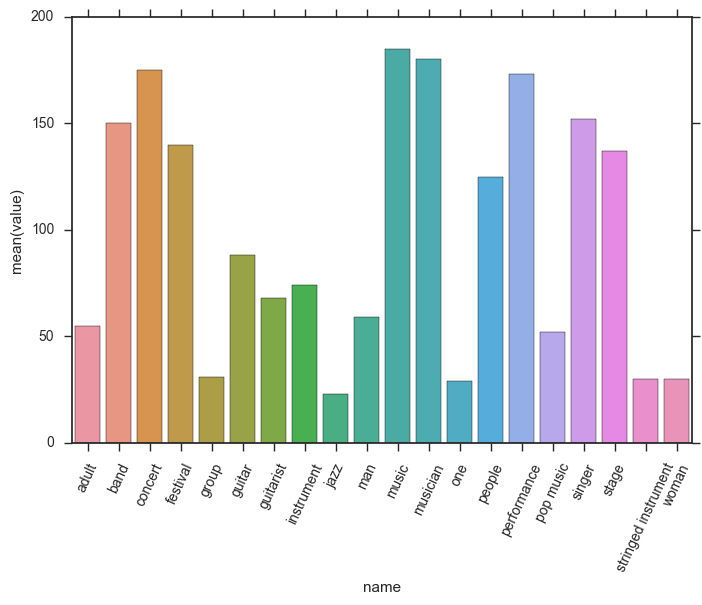

In [166]:
a = pd.DataFrame(imp20Metadata_Concert)
a['name'] = a.index
a.columns = ['app_id', 'id', 'value','name']

# select particular highest
# best5 = a.nlargest(5,'value')

sns.set(style="ticks", color_codes=False)
g=sns.barplot(x="name", y="value", data=a)
plt.setp(g.get_xticklabels(), rotation=65)
plt.show()